# **DATA 602 Final Project**

# **Exploring and Classifying Indian Food Images using Machine** 

The Indian Food Images dataset is a collection of more than 4,000 images of various Indian dishes, including biryani, samosas, dosas, curries, and many more. 

**Data Source -** [Indian Food Images Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/indian-food-images-dataset/code?select=Indian+Food+Images)

**Acknowledgment -** This Dataset is created from Google Images: [Google Images](https://images.google.com/)

**Data** - 4000+ Images of the Indian Food


**Srinivas Naidu Pasyavula**

**QC61851**

**DATA 602**

**Prof. Venkatesh Krishnamoorthy**

In [1]:
#!hostname -I
from google.colab import drive
drive.mount('/content/drive')
#
%cd /content/drive/MyDrive/'Colab Notebooks'/data602-fp
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/data602-fp
 archive   fp-d602.ipynb  'Indian Food Images'	 logs


# **Data Pipeline Setup**

## 1. Installing Dependencies and Setup

In [2]:
!pip install tensorflow opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
cac

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Removing dodgy images

In [7]:
import cv2
import imghdr

In [8]:
import os

data_dir = 'Indian Food Images'

# List files and directories in the specified directory
os.listdir(data_dir)


['misti_doi',
 'lassi',
 'modak',
 'unni_appam',
 'sheer_korma',
 'makki_di_roti_sarson_da_saag',
 'ariselu',
 'anarsa',
 'gajar_ka_halwa',
 'naan',
 'boondi',
 'palak_paneer',
 'basundi',
 'aloo_methi',
 'kachori',
 'aloo_matar',
 'aloo_tikki',
 'gulab_jamun',
 'litti_chokha',
 'qubani_ka_meetha',
 'daal_puri',
 'lyangcha',
 'ghevar',
 'butter_chicken',
 'dharwad_pedha',
 'sheera',
 'karela_bharta',
 'ledikeni',
 'malapua',
 'mysore_pak',
 'kofta',
 'aloo_gobi',
 'chicken_tikka',
 'rasgulla',
 'chhena_kheeri',
 'kadhi_pakoda',
 'sutar_feni',
 'rabri',
 'kalakand',
 'sohan_papdi',
 'daal_baati_churma',
 'kadai_paneer',
 'paneer_butter_masala',
 'pithe',
 'misi_roti',
 'aloo_shimla_mirch',
 'shankarpali',
 'chak_hao_kheer',
 'sohan_halwa',
 'bandar_laddu',
 'double_ka_meetha',
 'chicken_razala',
 'phirni',
 'cham_cham',
 'kuzhi_paniyaram',
 'chana_masala',
 'gavvalu',
 'kajjikaya',
 'bhatura',
 'poornalu',
 'ras_malai',
 'chikki',
 'navrattan_korma',
 'dum_aloo',
 'dal_tadka',
 'chicken

In [9]:
# Image extensions that we are dealing with
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
# for image_class in os.listdir(data_dir): 
#   print(image_class)

In [11]:
'''
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path) 
'''

"\nfor image_class in os.listdir(data_dir): \n    for image in os.listdir(os.path.join(data_dir, image_class)):\n        image_path = os.path.join(data_dir, image_class, image)\n        try: \n            img = cv2.imread(image_path)\n            tip = imghdr.what(image_path)\n            if tip not in image_exts: \n                print('Image not in ext list {}'.format(image_path))\n                os.remove(image_path)\n        except Exception as e: \n            print('Issue with image {}'.format(image_path))\n            # os.remove(image_path) \n"

# 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 4000 files belonging to 80 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
# Get Batch from iterator
batch = data_iterator.next()

In [16]:
#batch

In [17]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [18]:
len(batch)

2

In [19]:
batch[1]

array([67, 13, 36, 42, 21, 77,  3,  6, 39, 24, 58, 42, 15, 26, 14,  4,  4,
        9, 49, 62,  3, 14, 35, 68, 63, 74, 12, 68, 23, 32, 44,  4],
      dtype=int32)

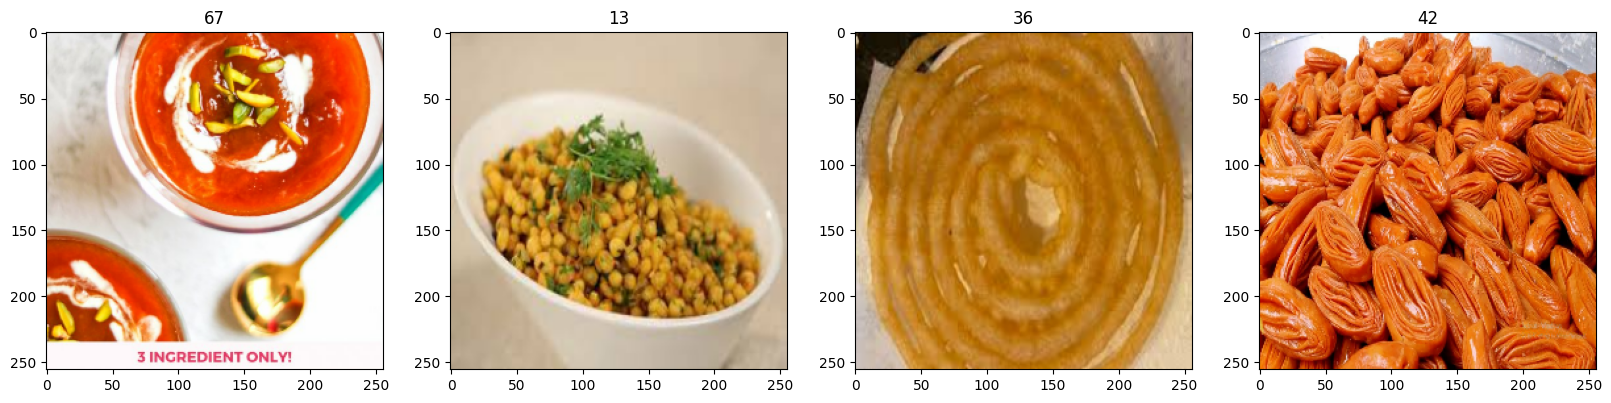

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [21]:
# Get Another Batch from iterator
batch = data_iterator.next()

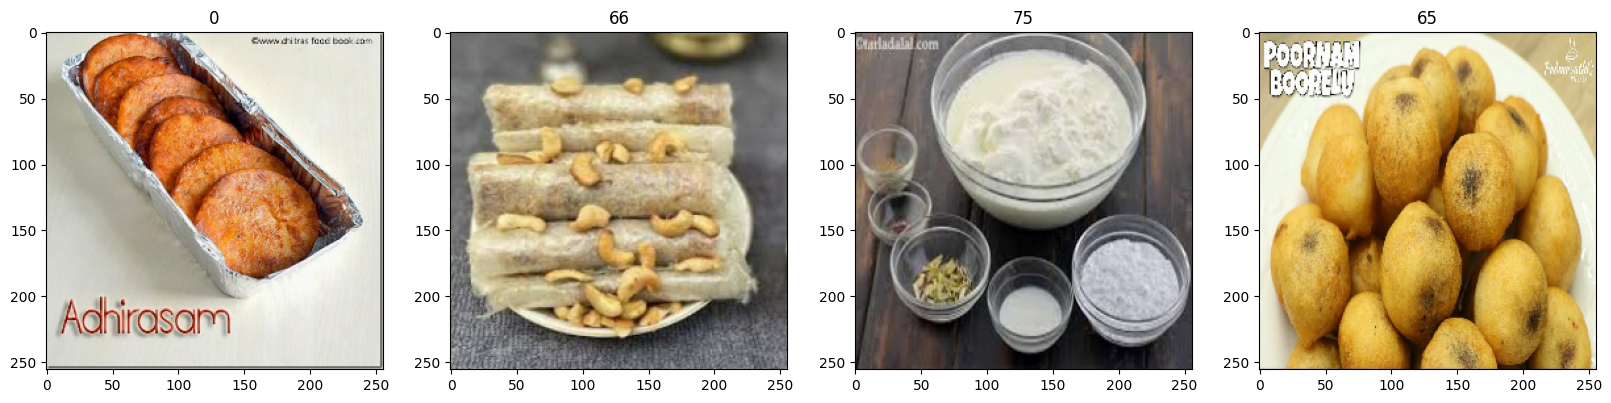

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## **PRE PROCESSING DATA**

## 4. Scale Data

In [23]:
data = data.map(lambda x,y: (x/255, y))

In [24]:
data.as_numpy_iterator().next()

(array([[[[0.22730163, 0.5292624 , 0.6469095 ],
          [0.18994716, 0.49190792, 0.609555  ],
          [0.26465228, 0.5666131 , 0.68426013],
          ...,
          [0.3882353 , 0.27058825, 0.27058825],
          [0.37855393, 0.26090688, 0.26090688],
          [0.36017156, 0.2425245 , 0.2425245 ]],
 
         [[0.21095665, 0.49371552, 0.6192057 ],
          [0.30230162, 0.586623  , 0.7121132 ],
          [0.3056028 , 0.59096587, 0.71645606],
          ...,
          [0.3882353 , 0.27058825, 0.27058825],
          [0.37855393, 0.26090688, 0.26090688],
          [0.36017156, 0.2425245 , 0.2425245 ]],
 
         [[0.40121782, 0.6583257 , 0.7925168 ],
          [0.3361022 , 0.59321004, 0.7274012 ],
          [0.3234222 , 0.58053005, 0.7147212 ],
          ...,
          [0.3882353 , 0.27058825, 0.27058825],
          [0.3882353 , 0.27058825, 0.27058825],
          [0.3680147 , 0.25036764, 0.25036764]],
 
         ...,
 
         [[0.43256357, 0.36418122, 0.39874005],
          [0.46461

In [25]:
data.as_numpy_iterator().next()[0].max()

1.0

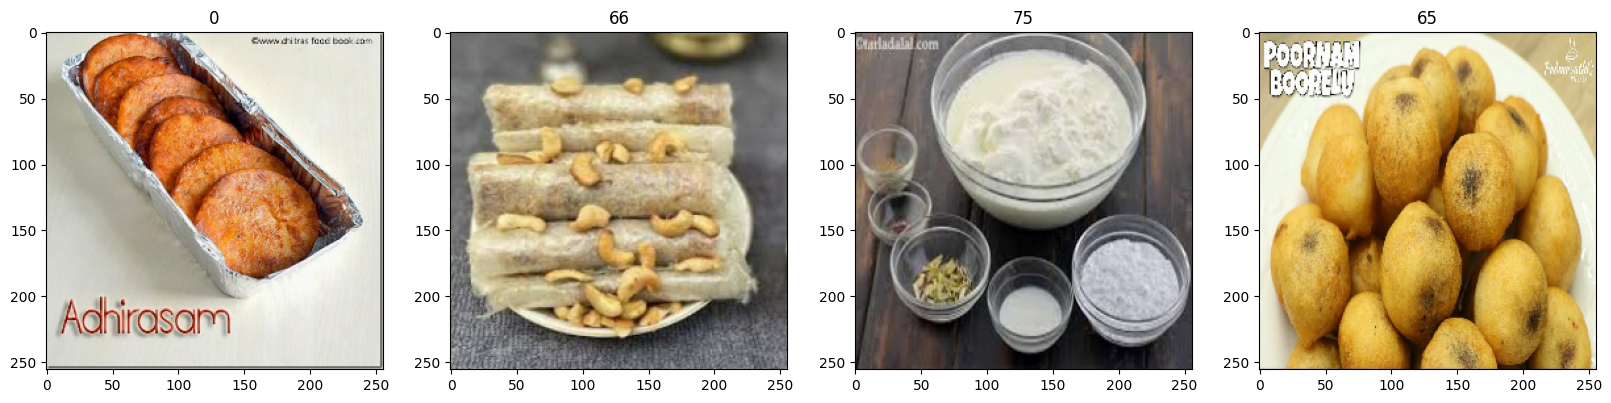

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 5. Split Data

In [27]:
len(data)

125

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [29]:
train_size+val_size+test_size

125

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## **Deep Model**

## 6. Build Deep Learning Model

In [31]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 7. Train

In [37]:
logdir='logs'

In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
hist = model.fit(train, epochs=87, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/87
87/87 [==============================] - 1292s 15s/step - loss: -285790944.0000 - accuracy: 0.0136 - val_loss: -2276591616.0000 - val_accuracy: 0.0125
Epoch 2/87
87/87 [==============================] - 34s 381ms/step - loss: -53891485696.0000 - accuracy: 0.0144 - val_loss: -212371095552.0000 - val_accuracy: 0.0125
Epoch 3/87
87/87 [==============================] - 34s 381ms/step - loss: -1013788180480.0000 - accuracy: 0.0133 - val_loss: -2662178226176.0000 - val_accuracy: 0.0100
Epoch 4/87
87/87 [==============================] - 33s 365ms/step - loss: -7134539415552.0000 - accuracy: 0.0136 - val_loss: -14681086361600.0000 - val_accuracy: 0.0088
Epoch 5/87
87/87 [==============================] - 34s 380ms/step - loss: -29516829294592.0000 - accuracy: 0.0136 - val_loss: -53399206756352.0000 - val_accuracy: 0.0113
Epoch 6/87
87/87 [==============================] - 34s 377ms/step - loss: -90014797004800.0000 - accuracy: 0.0136 - val_loss: -144198409912320.0000 - val_accurac

## 8. Plot Performance

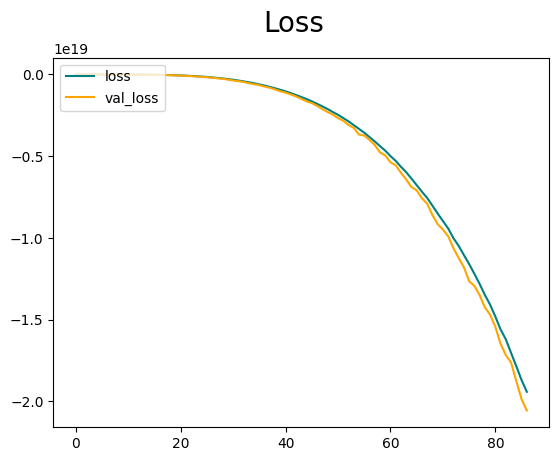

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

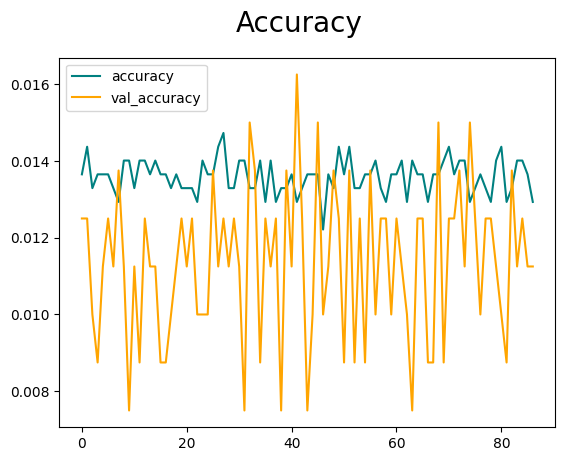

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 9. Evaluate

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [44]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 40ms/step


In [45]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9831731, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.014423077, shape=(), dtype=float32)


# 10. Test

In [46]:
import cv2

In [50]:
data_dir_1 = 'Indian Food Images/adhirasam'

# List files and directories in the specified directory
#os.listdir(data_dir_1)

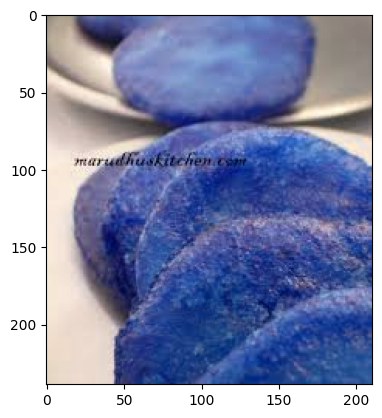

In [53]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Indian Food Images/adhirasam/7dd072e690.jpg')

if img is None:
    print("Error loading image")
else:
    plt.imshow(img)
    plt.show()



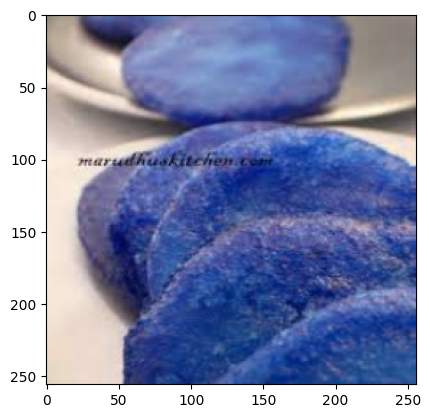

In [54]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 215ms/step


In [57]:
yhat

array([[1.]], dtype=float32)

In [56]:
if yhat > 0.5: 
    print(f'Predicted class is adhirasam')
else:
    print(f'Predicted class is not adhirasam')

Predicted class is adhirasam


## 11. Save the Model

In [62]:
from tensorflow.keras.models import load_model

In [63]:
model.save(os.path.join('Indian Food Images','indian_foods_imageclassifier.h5'))

In [66]:
new_model = load_model('Indian Food Images/indian_foods_imageclassifier.h5')

In [67]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 74ms/step


array([[1.]], dtype=float32)

# **Interpretation**

The Deep Learning model exactly predicts the images based on the input image.

# **References -**

1. [Code Inspired from as a Reference](https://github.com/nicknochnack/ImageClassification)

2. [Data set Taken from](https://www.kaggle.com/code/stpeteishii/indian-food-torch-cnn-alexnet)